<a href="https://colab.research.google.com/github/nadella123/rock-paper-scissor/blob/main/malware.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Load data**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv(r'PDFMalware2022.csv')

In [ ]:
## lets see the top 5 rows
df.head()

,Fine name,pdfsize,metadata size,pages,xref Length,title characters,isEncrypted,embedded files,images,text,...,AA,OpenAction,Acroform,JBIG2Decode,RichMedia,launch,EmbeddedFile,XFA,Colors,Class
0,aedaf3c5428a2e3ba600c44b96ad78dfdf8ed76e7df129...,8.0,180.0,1.0,11.0,0.0,0.0,0.0,0,No,...,0,1,0,0,0,0,0,0,0.0,Malicious
1,fe767fb2584a10c010626263ea950643ac25f6ca24628f...,15.0,224.0,0.0,20.0,7.0,0.0,0.0,0,No,...,0,0,1,0,0,0,8,1,0.0,Malicious
2,544c5223ee301affad514b6fa585b3191625aba0a7222b...,4.0,468.0,2.0,13.0,16.0,0.0,0.0,0,Yes,...,0,1,0,0,0,0,0,0,0.0,Malicious
3,669772e626deccb9cfb7eb6a61e13d248d0ea08f1abe15...,17.0,250.0,1.0,15.0,0.0,0.0,0.0,0,No,...,0,1,1,0,0,0,0,0,0.0,Malicious
4,e434c884f45a691b0bf33d765f61794007eb0b8bb9f590...,7.0,252.0,3.0,16.0,45.0,0.0,0.0,0,Yes,...,0,1,0,0,0,0,0,0,0.0,Malicious


In [ ]:
## lets see the bottom 5 rows
df.tail()

,Fine name,pdfsize,metadata size,pages,xref Length,title characters,isEncrypted,embedded files,images,text,...,AA,OpenAction,Acroform,JBIG2Decode,RichMedia,launch,EmbeddedFile,XFA,Colors,Class
10021,908f8e3411d1bdf5e0fa7ca953c85cc4f133729fd4c71a...,529.0,296.0,1.0,87.0,8.0,0.0,0.0,3,No,...,0,1,0,0,0,0,0,0,0.0,Malicious
10022,72654b36f6a240d953a9ce3e898a4dfa381031ba7f5e2a...,73.0,314.0,1.0,16.0,3.0,0.0,0.0,-1,unclear,...,0,1,0,0,0,0,0,0,0.0,Malicious
10023,dad02289bc442e235961f4cf87cbde364a2250bdc57632...,4.0,377.0,2.0,13.0,11.0,0.0,0.0,0,Yes,...,0,1,0,0,0,0,0,0,0.0,Malicious
10024,b219390e223ea263476d65277d00804cfd0a93023e1903...,38.0,338.0,1.0,200006.0,13.0,0.0,0.0,0,Yes,...,0,1,0,0,0,0,0,0,0.0,Malicious
10025,b76c4910d7c637f32ebf175247d489a311c2a584a1ac6d...,2.0,180.0,1.0,11.0,0.0,0.0,1.0,0,Yes,...,23,0,0,0,0,0,0,0,0.0,Malicious


In [ ]:
## lets see the shape of the dataset
df.shape

(10026, 33)

In [ ]:
## Lets see the columns present in dataset
df.columns

Index(['Fine name', 'pdfsize', 'metadata size', 'pages', 'xref Length',
       'title characters', 'isEncrypted', 'embedded files', 'images', 'text',
       'header', 'obj', 'endobj', 'stream', 'endstream', 'xref', 'trailer',
       'startxref', 'pageno', 'encrypt', 'ObjStm', 'JS', 'Javascript', 'AA',
       'OpenAction', 'Acroform', 'JBIG2Decode', 'RichMedia', 'launch',
       'EmbeddedFile', 'XFA', 'Colors', 'Class'],
      dtype='object')

In [ ]:
## Lets see the information about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10026 entries, 0 to 10025
Data columns (total 33 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Fine name         10026 non-null  object 
 1   pdfsize           10025 non-null  float64
 2   metadata size     10025 non-null  float64
 3   pages             10025 non-null  float64
 4   xref Length       10025 non-null  float64
 5   title characters  10025 non-null  float64
 6   isEncrypted       10025 non-null  float64
 7   embedded files    10025 non-null  float64
 8   images            10025 non-null  object 
 9   text              10025 non-null  object 
 10  header            10025 non-null  object 
 11  obj               10023 non-null  object 
 12  endobj            10023 non-null  object 
 13  stream            10023 non-null  float64
 14  endstream         10023 non-null  object 
 15  xref              10023 non-null  object 
 16  trailer           10023 non-null  float6

In [ ]:
## Lets see the null values in dataset

df.isna().sum()

,0
Fine name,0
pdfsize,1
metadata size,1
pages,1
xref Length,1
title characters,1
isEncrypted,1
embedded files,1
images,1
text,1


In [ ]:
# Get the numerical columns of the DataFrame
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Define the function to remove outliers using the IQR method
def remove_outliers_iqr(column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[column] = df[column].clip(lower=lower_bound, upper=upper_bound)

# Iterate over each numerical column and remove outliers
for column in numerical_columns:
    remove_outliers_iqr(column)

# **Preprocessing The Data**

In [ ]:
l = []
for i in df.columns:
    if df[i].dtype == 'object':
        l.append(i)
print(l)

['Fine name', 'images', 'text', 'header', 'obj', 'endobj', 'endstream', 'xref', 'startxref', 'pageno', 'JS', 'Javascript', 'AA', 'OpenAction', 'Acroform', 'JBIG2Decode', 'RichMedia', 'launch', 'EmbeddedFile', 'XFA', 'Class']


In [ ]:
df['Class'].value_counts().to_dict()

{'Malicious': 5557, 'Benign': 4468}

In [ ]:
df['Class'].replace({'Malicious': 1, 'Benign': 0}, inplace=True)

<ipython-input-12-6d0e4d5fcafb>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Class'].replace({'Malicious': 1, 'Benign': 0}, inplace=True)
<ipython-input-12-6d0e4d5fcafb>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Class'].replace({'Malicious': 1, 'Benign': 0}, inplace=True)


In [ ]:
df['Class'].dtype

dtype('float64')

In [ ]:
df['startxref'].value_counts().to_dict()

{'1': 5065,
 '2': 2812,
 '0': 629,
 '3': 620,
 '-1': 519,
 '4': 206,
 '5': 88,
 '6': 25,
 'bytes[endHeader]': 22,
 '10': 10,
 '7': 8,
 '9': 5,
 '8': 4,
 '12': 3,
 '24': 2,
 '68': 1,
 '39': 1,
 '11': 1,
 '20': 1,
 '15': 1}

In [ ]:
df['startxref'].replace({'1': 1,
 '2': 2,
 '0': 0,
 '3': 3,
 '-1': -1,
 '4': 4,
 '5': 5,
 '6': 6,
 'bytes[endHeader]': 22,
 '10': 10,
 '7': 7,
 '9': 9,
 '8': 8,
 '12': 12,
 '24': 24,
 '68': 68,
 '39': 39,
 '11': 11,
 '20': 20,
 '15': 15}, inplace=True)

<ipython-input-15-6af46c279fad>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['startxref'].replace({'1': 1,
<ipython-input-15-6af46c279fad>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['startxref'].replace({'1': 1,


In [ ]:
df['xref'].value_counts().to_dict()

{'1': 4545,
 '2': 2525,
 '0': 1967,
 '-1': 519,
 '3': 191,
 '4': 163,
 '6': 42,
 'pdfid.py': 22,
 '5': 12,
 '8': 9,
 '7': 8,
 '10': 5,
 '9': 3,
 '22': 2,
 '16': 2,
 '46': 2,
 '14': 2,
 '28': 1,
 '12': 1,
 '33': 1,
 '15': 1}

In [ ]:
df['xref'].replace({'1': 1,
 '2': 2,
 '0': 0,
 '-1': -1,
 '3': 3,
 '4': 4,
 '6': 6,
 'pdfid.py': 11,
 '5': 5,
 '8': 8,
 '7': 7,
 '10': 10,
 '9': 9,
 '22': 22,
 '16': 16,
 '46': 46,
 '14': 14,
 '28': 28,
 '12': 12,
 '33': 33,
 '15': 15}, inplace=True)

<ipython-input-17-a7bc818d970e>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['xref'].replace({'1': 1,
<ipython-input-17-a7bc818d970e>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['xref'].replace({'1': 1,


In [ ]:
df['xref'].dtype

dtype('float64')

In [ ]:
df['text'].replace({'No': 0, 'Yes': 1, 'unclear': 2, '-1': 2, '0': 2}, inplace=True)

<ipython-input-19-1ccaa33e5af1>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['text'].replace({'No': 0, 'Yes': 1, 'unclear': 2, '-1': 2, '0': 2}, inplace=True)
<ipython-input-19-1ccaa33e5af1>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['text'].replace({'No': 0, 'Yes': 1, 'unclear': 2, 

In [ ]:
df['text'].value_counts().to_dict()

{0.0: 5400, 1.0: 3761, 2.0: 864}

In [ ]:
df['headerlen'] = df['Fine name'].apply(len)


In [ ]:
for col in l:
    # Forward fill missing values
    df[col] = df[col].ffill()
    # Convert to numeric, setting invalid parsing as NaN
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Check the data types of all columns after the conversion
print(df.dtypes)

Fine name           float64
pdfsize             float64
metadata size       float64
pages               float64
xref Length         float64
title characters    float64
isEncrypted         float64
embedded files      float64
images              float64
text                float64
header              float64
obj                 float64
endobj              float64
stream              float64
endstream           float64
xref                float64
trailer             float64
startxref           float64
pageno              float64
encrypt             float64
ObjStm              float64
JS                  float64
Javascript          float64
AA                  float64
OpenAction          float64
Acroform            float64
JBIG2Decode         float64
RichMedia           float64
launch              float64
EmbeddedFile        float64
XFA                 float64
Colors              float64
Class               float64
headerlen             int64
dtype: object


In [ ]:
df.drop(['Fine name','header'], axis=1, inplace=True)

In [ ]:
df.isna().sum()

,0
pdfsize,1
metadata size,1
pages,1
xref Length,1
title characters,1
isEncrypted,1
embedded files,1
images,1
text,0
obj,24


In [ ]:
for i in df.columns:
    df[i].fillna(method = 'ffill', inplace=True)

<ipython-input-25-5a16014e37e4>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[i].fillna(method = 'ffill', inplace=True)
<ipython-input-25-5a16014e37e4>:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df[i].fillna(method = 'ffill', inplace=True)


In [ ]:
df.isna().sum()

,0
pdfsize,0
metadata size,0
pages,0
xref Length,0
title characters,0
isEncrypted,0
embedded files,0
images,0
text,0
obj,0


In [ ]:
df.to_csv('Final_PDFMalware.csv', index=False)

# **Splitting Data Into X and Y**

In [ ]:
x = df.drop('Class', axis=1)
y = df['Class']

In [ ]:
df['Class'].value_counts().to_dict()

{1.0: 5558, 0.0: 4468}

In [ ]:
from imblearn.over_sampling import SMOTE

sm = SMOTE()
x, y = sm.fit_resample(x, y)

In [ ]:
from sklearn.feature_selection import SelectKBest, f_classif

selector = SelectKBest(score_func=f_classif, k='all')
selector.fit(x, y)

scores = pd.Series(selector.scores_, index=x.columns)


less_informative_features = scores[scores < 200.0].index
less_data = x[less_informative_features]
less_data.shape

/usr/local/lib/python3.11/dist-packages/sklearn/feature_selection/_univariate_selection.py:111: UserWarning: Features [ 5  6 17 18 29] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.11/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


(11116, 8)

In [ ]:
X_less = less_data

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 1)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((7781, 31), (3335, 31), (7781,), (3335,))

# **Model Training**

In [ ]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.metrics import confusion_matrix, f1_score, precision_score, roc_curve, recall_score, roc_auc_score, accuracy_score, classification_report
from sklearn.model_selection import cross_val_score, cross_val_predict, StratifiedKFold

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_scaled = scaler.fit_transform(X_less)

### Random Forest Classifier

Random Forest Cross-Validation Scores: [0.98291367 0.98830935 0.98561151 0.9676259  0.93705036 0.90017986
 0.91989199 0.89018902 0.88478848 0.95319532]
Random Forest Mean Accuracy: 0.9409755453962664


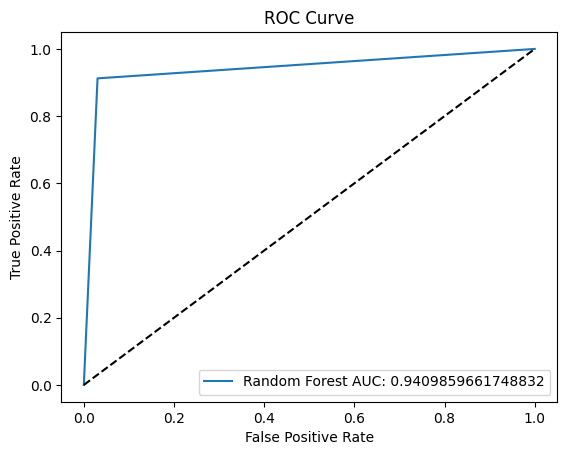

In [ ]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
scores_rf = cross_val_score(rf_model, X_less, y, cv=10, scoring='accuracy')
y_pred_rf = cross_val_predict(rf_model, X_less, y, cv=10, method='predict')
print("Random Forest Cross-Validation Scores:", scores_rf)
print("Random Forest Mean Accuracy:", np.mean(scores_rf))
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y, y_pred_rf)
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest AUC: {roc_auc_score(y, y_pred_rf)}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

### AdaBoost Classifier

AdaBoost Cross-Validation Scores: [0.98201439 0.98651079 0.98651079 0.95323741 0.89658273 0.83003597
 0.9279928  0.88478848 0.86318632 0.94149415]
AdaBoost Mean Accuracy: 0.9252353832505552


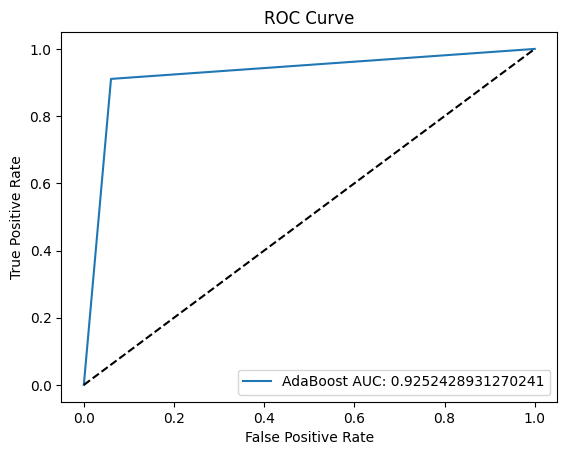

In [ ]:
ab_model = AdaBoostClassifier(n_estimators=100, random_state=42)
scores_ab = cross_val_score(ab_model, X_less, y, cv=10, scoring='accuracy')
y_pred_ab = cross_val_predict(ab_model, X_less, y, cv=10, method='predict')
print("AdaBoost Cross-Validation Scores:", scores_ab)
print("AdaBoost Mean Accuracy:", np.mean(scores_ab))
fpr_ab, tpr_ab, thresholds_ab = roc_curve(y, y_pred_ab)
plt.plot(fpr_ab, tpr_ab, label=f'AdaBoost AUC: {roc_auc_score(y, y_pred_ab)}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()


### K-Nearest Neighbors

KNN Cross-Validation Scores: [0.51348921 0.66906475 0.67446043 0.68435252 0.70143885 0.78776978
 0.53555356 0.52745275 0.71377138 0.70657066]
KNN Mean Accuracy: 0.6513923874401829


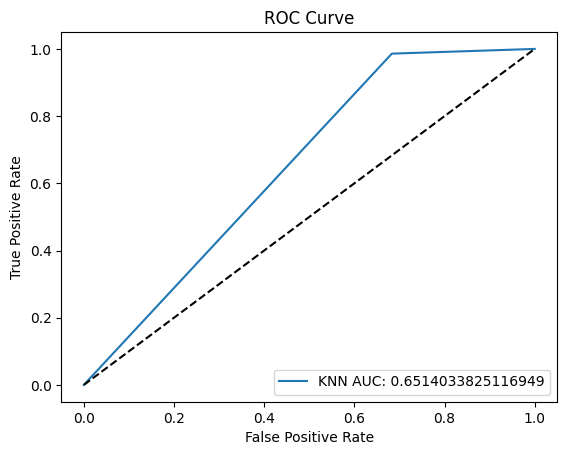

In [ ]:
knn_model = KNeighborsClassifier(n_neighbors=5)
scores_knn = cross_val_score(knn_model, X_less, y, cv=10, scoring='accuracy')
y_pred_knn = cross_val_predict(knn_model, X_less, y, cv=10, method='predict')
print("KNN Cross-Validation Scores:", scores_knn)
print("KNN Mean Accuracy:", np.mean(scores_knn))
fpr_knn, tpr_knn, thresholds_knn = roc_curve(y, y_pred_knn)
plt.plot(fpr_knn, tpr_knn, label=f'KNN AUC: {roc_auc_score(y, y_pred_knn)}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

### Support Vector Machine

SVM Cross-Validation Scores: [0.95593525 0.94784173 0.96582734 0.94514388 0.89658273 0.82823741
 0.81728173 0.82088209 0.80828083 0.90369037]
SVM Mean Accuracy: 0.8889703358825092


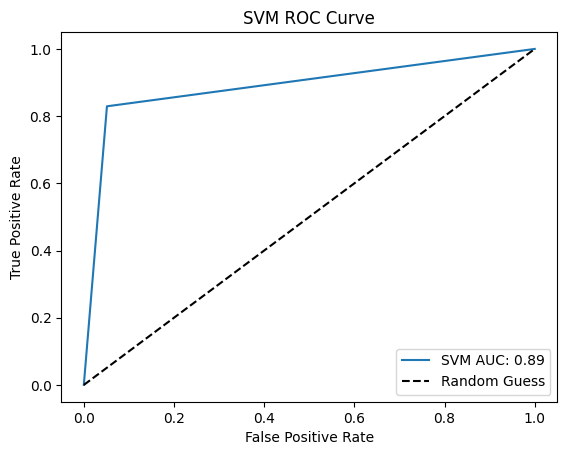

In [ ]:
svm_model = SVC(kernel='linear', probability=True, random_state=42)

scores_svm = cross_val_score(svm_model, x_scaled, y, cv=10, scoring='accuracy')
print("SVM Cross-Validation Scores:", scores_svm)
print("SVM Mean Accuracy:", np.mean(scores_svm))

y_pred_svm = cross_val_predict(svm_model, x_scaled, y, cv=10, method='predict')

fpr_svm, tpr_svm, thresholds_svm = roc_curve(y, y_pred_svm)
auc_svm = roc_auc_score(y, y_pred_svm)

plt.plot(fpr_svm, tpr_svm, label=f'SVM AUC: {auc_svm:.2f}')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('SVM ROC Curve')
plt.legend(loc='lower right')
plt.show()

### Gradient Boosting

Gradient Boosting Cross-Validation Scores: [0.98291367 0.98830935 0.98561151 0.9721223  0.93615108 0.90107914
 0.93159316 0.89018902 0.87938794 0.95319532]
Gradient Boosting Mean Accuracy: 0.9420552486903369


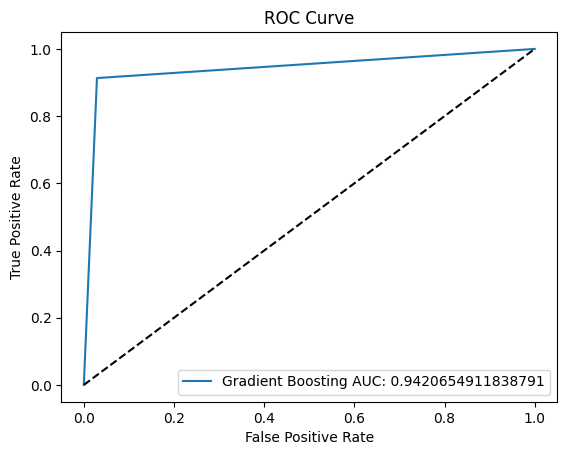

In [ ]:
gb_model = GradientBoostingClassifier(n_estimators=100, random_state=42)
scores_gb = cross_val_score(gb_model, X_less, y, cv=10, scoring='accuracy')
y_pred_gb = cross_val_predict(gb_model, X_less, y, cv=10, method='predict')
print("Gradient Boosting Cross-Validation Scores:", scores_gb)
print("Gradient Boosting Mean Accuracy:", np.mean(scores_gb))
fpr_gb, tpr_gb, thresholds_gb = roc_curve(y, y_pred_gb)
plt.plot(fpr_gb, tpr_gb, label=f'Gradient Boosting AUC: {roc_auc_score(y, y_pred_gb)}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()


### Decision Tree Classifier

Cross-Validation Scores: [0.98381295 0.98830935 0.98471223 0.96672662 0.93794964 0.89838129
 0.9189919  0.89108911 0.88568857 0.95589559]
Mean Accuracy: 0.9411557252847587


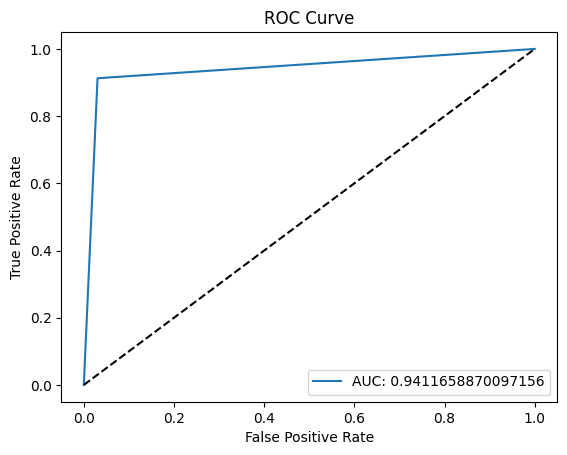

In [ ]:
dt_model = DecisionTreeClassifier(criterion='entropy', random_state=42)
scores = cross_val_score(dt_model, X_less, y, cv=10, scoring='accuracy')
y_pred = cross_val_predict(dt_model, X_less, y, cv=10, method='predict')
print("Cross-Validation Scores:", scores)
print("Mean Accuracy:", np.mean(scores))
fpr, tpr, thresholds = roc_curve(y, y_pred)
plt.plot(fpr, tpr, label=f'AUC: {roc_auc_score(y, y_pred)}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

# **K-Best**

In [ ]:
from sklearn.feature_selection import mutual_info_classif
# determine the mutual information
mutual_info = mutual_info_classif(x_train, y_train)
mutual_info

array([0.31874742, 0.41483794, 0.14250926, 0.35081821, 0.10182984,
       0.        , 0.0185309 , 0.16360409, 0.15023144, 0.39209319,
       0.39046318, 0.28421389, 0.29493098, 0.23499495, 0.25451191,
       0.33415128, 0.16112207, 0.        , 0.        , 0.33934546,
       0.36130323, 0.03031819, 0.19729297, 0.07625229, 0.03505005,
       0.02999482, 0.03987134, 0.03815545, 0.05017841, 0.00044484,
       0.00611569])

In [ ]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = x_train.columns
mutual_info.sort_values(ascending=False)

,0
metadata size,0.414838
obj,0.392093
endobj,0.390463
Javascript,0.361303
xref Length,0.350818
JS,0.339345
startxref,0.334151
pdfsize,0.318747
endstream,0.294931
stream,0.284214


<Axes: >

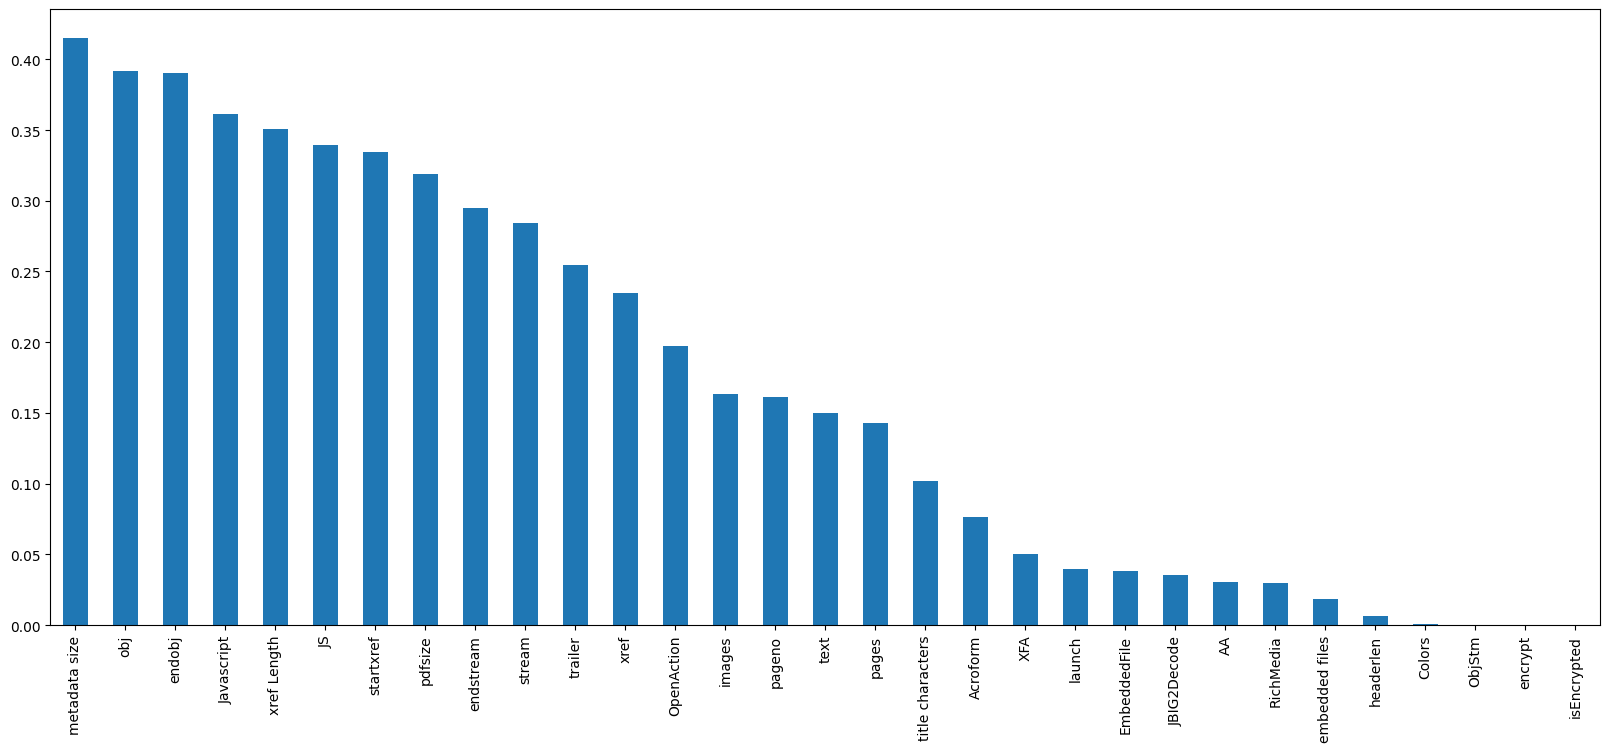

In [ ]:
mutual_info.sort_values(ascending=False).plot.bar(figsize=(20, 8))

In [ ]:
from sklearn.feature_selection import SelectKBest

select_18_columns = SelectKBest(mutual_info_classif, k=18)
select_18_columns.fit(x_train, y_train)
x_train.columns[select_18_columns.get_support()]

Index(['pdfsize', 'metadata size', 'pages', 'xref Length', 'title characters',
       'images', 'text', 'obj', 'endobj', 'stream', 'endstream', 'xref',
       'trailer', 'startxref', 'pageno', 'JS', 'Javascript', 'OpenAction'],
      dtype='object')

In [ ]:
x_train = x_train[['pdfsize', 'metadata size', 'pages', 'xref Length', 'title characters',
       'images', 'text', 'obj', 'endobj', 'stream', 'endstream', 'xref',
       'trailer', 'startxref', 'pageno', 'JS', 'Javascript', 'OpenAction']]

In [ ]:
x_test = x_test[['pdfsize', 'metadata size', 'pages', 'xref Length', 'title characters',
       'images', 'text', 'obj', 'endobj', 'stream', 'endstream', 'xref',
       'trailer', 'startxref', 'pageno', 'JS', 'Javascript', 'OpenAction']]

In [ ]:
combined_df = pd.concat([x_test, y_test], axis=1)

# **Model Training After K-Best**

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

### RF after K-Best

In [ ]:
rf_k = RandomForestClassifier(ccp_alpha=0.0012)
rf_k.fit(x_train, y_train)

RandomForestClassifier(ccp_alpha=0.0012)

In [ ]:

param_dist = {
    'ccp_alpha': np.linspace(0.0001, 0.01, 5),  # Reduce the range
    'n_estimators': [50, 100, 150],  # Fewer options
    'max_depth': [None, 10, 20],  # Only a few depths
    'min_samples_split': [2, 5],  # Key options
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt', 'log2']
}

random_search = RandomizedSearchCV(
    estimator=rf_k,
    param_distributions=param_dist,
    n_iter=20,
    cv=3,
    scoring='accuracy',
    n_jobs=-1,
    random_state=42
)
random_search.fit(x_train, y_train)

print("Best Parameters:", random_search.best_params_)
print("Best Cross-Validation Accuracy:", random_search.best_score_)


Best Parameters: {'n_estimators': 50, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 20, 'ccp_alpha': 0.0001}
Best Cross-Validation Accuracy: 0.9906181886804944


In [ ]:
rf_k = random_search.best_estimator_
rf_k.fit(x_train, y_train)

RandomForestClassifier(ccp_alpha=0.0001, max_depth=20, min_samples_leaf=2,
                       min_samples_split=5, n_estimators=50)

In [ ]:
y_pred = rf_k.predict(x_train)
acc_rf_k = accuracy_score(y_train, y_pred)
ps_rf_k = precision_score(y_train, y_pred)
rs_rf_k = recall_score(y_train, y_pred)
f1_rf_k = f1_score(y_train, y_pred)

print(f'Accuracy Score = {acc_rf_k}')
print(f'Precision Score = {ps_rf_k}')
print(f'Recall Score = {rs_rf_k}')
print(f'F1 Score = {f1_rf_k}')

Accuracy Score = 0.9962729726256265
Precision Score = 0.9968903861103913
Recall Score = 0.995600414078675
F1 Score = 0.9962449825197462


In [ ]:
y_pred = rf_k.predict(x_test)
acc_rf_k1 = accuracy_score(y_test, y_pred)
ps_rf_k1 = precision_score(y_test, y_pred)
rs_rf_k1 = recall_score(y_test, y_pred)
f1_rf_k1 = f1_score(y_test, y_pred)

print(f'Accuracy Score = {acc_rf_k1}')
print(f'Precision Score = {ps_rf_k1}')
print(f'Recall Score = {rs_rf_k1}')
print(f'F1 Score = {f1_rf_k1}')

Accuracy Score = 0.991304347826087
Precision Score = 0.990571596935769
Recall Score = 0.9923258559622196
F1 Score = 0.9914479504570923


Here is the AUC score of the RF_K model: 0.9912878518080445


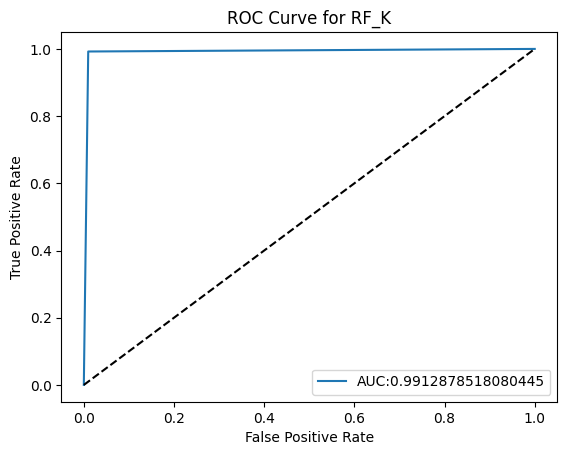

In [ ]:
# Printing the AUC score of the model
print(f'Here is the AUC score of the RF_K model: {roc_auc_score(y_test, y_pred)}')
# Plotting the ROC curve for the model
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.plot(fpr, tpr, label=f'AUC:{roc_auc_score(y_test, y_pred)}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for RF_K')
plt.legend(loc='lower right')
plt.show()

### AdaBoost after K-Best

In [ ]:
adb_k = AdaBoostClassifier()
adb_k.fit(x_train, y_train)

AdaBoostClassifier()

In [ ]:

param_dist_ada = {
    'n_estimators': [50, 100, 150, 200],
    'learning_rate': [0.01, 0.1, 1, 10],
}

ada_model = AdaBoostClassifier(random_state=42)

random_search_ada = RandomizedSearchCV(ada_model, param_distributions=param_dist_ada, n_iter=10, cv=3, scoring='accuracy', n_jobs=-1, random_state=42)
random_search_ada.fit(x_train, y_train)

print("Best Parameters for AdaBoost:", random_search_ada.best_params_)
print("Best Cross-Validation Accuracy for AdaBoost:", random_search_ada.best_score_)
adb_k = random_search_ada.best_estimator_
adb_k.fit(x_train, y_train)


Best Parameters for AdaBoost: {'n_estimators': 200, 'learning_rate': 1}
Best Cross-Validation Accuracy for AdaBoost: 0.9821361368403535


AdaBoostClassifier(learning_rate=1, n_estimators=200, random_state=42)

In [ ]:
y_pred = adb_k.predict(x_train)
acc_adb_k = accuracy_score(y_train, y_pred)
ps_adb_k = precision_score(y_train, y_pred)
rs_adb_k = recall_score(y_train, y_pred)
f1_adb_k = f1_score(y_train, y_pred)

print(f'Accuracy Score = {acc_adb_k}')
print(f'Precision Score = {ps_adb_k}')
print(f'Recall Score = {rs_adb_k}')
print(f'F1 Score = {f1_adb_k}')

Accuracy Score = 0.9835496722786274
Precision Score = 0.9831867563372996
Recall Score = 0.9836956521739131
F1 Score = 0.9834411384217335


In [ ]:
y_pred = adb_k.predict(x_test)
acc_adb_k1 = accuracy_score(y_test, y_pred)
ps_adb_k1 = precision_score(y_test, y_pred)
rs_adb_k1 = recall_score(y_test, y_pred)
f1_adb_k1 = f1_score(y_test, y_pred)

print(f'Accuracy Score = {acc_adb_k1}')
print(f'Precision Score = {ps_adb_k1}')
print(f'Recall Score = {rs_adb_k1}')
print(f'F1 Score = {f1_adb_k1}')

Accuracy Score = 0.9802098950524738
Precision Score = 0.9822274881516587
Recall Score = 0.9787485242030697
F1 Score = 0.9804849201655825


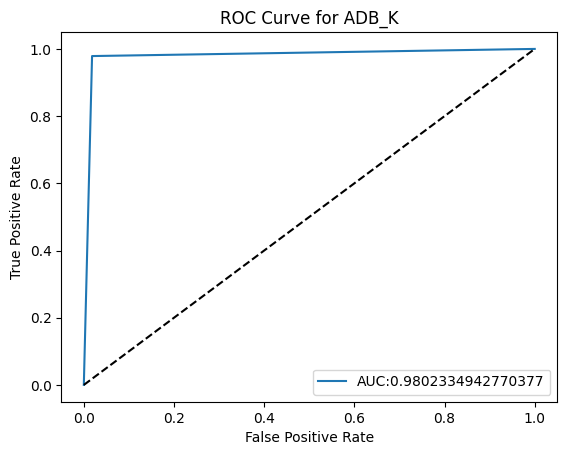

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.plot(fpr, tpr, label=f'AUC:{roc_auc_score(y_test, y_pred)}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for ADB_K')
plt.legend(loc='lower right')
plt.show()

### KNN after K-Best

In [ ]:
# Ensure x_train is a NumPy array or pandas DataFrame and y_train is a 1D NumPy array or pandas Series
X_train = np.asarray(x_train)  # Converts to NumPy array if not already
X_test = np.asarray(x_test)
Y_train = np.asarray(y_train).ravel()  # Ensures y_train is 1D
Y_test = np.asarray(y_test).ravel()  # Ensures y_train is 1D

# Initialize the KNeighborsClassifier
knn_k = KNeighborsClassifier()

# Fit the model
knn_k.fit(X_train, Y_train)


KNeighborsClassifier()

In [ ]:

param_dist_knn = {
    'n_neighbors': [3, 5, 7, 10, 15],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

knn_model = KNeighborsClassifier()

random_search_knn = RandomizedSearchCV(knn_model, param_distributions=param_dist_knn, n_iter=10, cv=3, scoring='accuracy', n_jobs=-1, random_state=42)
random_search_knn.fit(X_train, y_train)

print("Best Parameters for KNN:", random_search_knn.best_params_)
print("Best Cross-Validation Accuracy for KNN:", random_search_knn.best_score_)

knn_k = random_search_knn.best_estimator_
knn_k.fit(X_train, Y_train)


Best Parameters for KNN: {'weights': 'distance', 'n_neighbors': 3, 'metric': 'manhattan'}
Best Cross-Validation Accuracy for KNN: 0.9804654168950012


KNeighborsClassifier(metric='manhattan', n_neighbors=3, weights='distance')

In [ ]:
# Make predictions
y_pred = knn_k.predict(X_test)

# Calculate the metrics
acc_knn_k1 = accuracy_score(Y_test, y_pred)
ps_knn_k1 = precision_score(Y_test, y_pred, average='weighted')
rs_knn_k1 = recall_score(Y_test, y_pred, average='weighted')
f1_knn_k1 = f1_score(Y_test, y_pred, average='weighted')

# Print the scores
print(f'Accuracy Score = {acc_knn_k1}')
print(f'Precision Score = {ps_knn_k1}')
print(f'Recall Score = {rs_knn_k1}')
print(f'F1 Score = {f1_knn_k1}')

Accuracy Score = 0.9847076461769115
Precision Score = 0.9847390030404473
Recall Score = 0.9847076461769115
F1 Score = 0.984708361246792


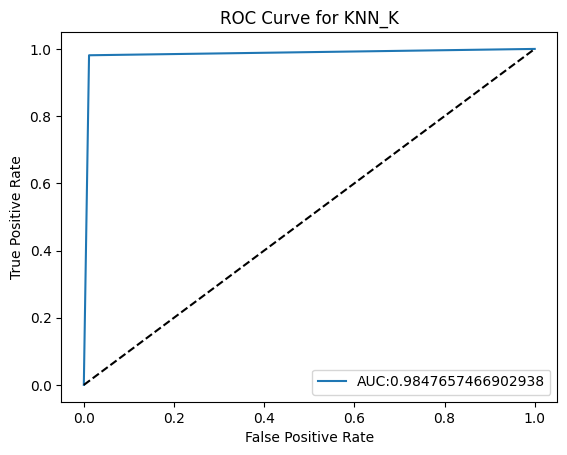

In [ ]:
fpr, tpr, thresholds = roc_curve(Y_test, y_pred)
plt.plot(fpr, tpr, label=f'AUC:{roc_auc_score(Y_test, y_pred)}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for KNN_K')
plt.legend(loc='lower right')
plt.show()

### SVM after K-Best

In [ ]:
svm_k = SVC()
svm_k.fit(x_train, y_train)

SVC()

In [ ]:
y_pred = svm_k.predict(x_train)
acc_svm_k = accuracy_score(y_train, y_pred)
ps_svm_k = precision_score(y_train, y_pred)
rs_svm_k = recall_score(y_train, y_pred)
f1_svm_k = f1_score(y_train, y_pred)

print(f'Accuracy Score = {acc_svm_k}')
print(f'Precision Score = {ps_svm_k}')
print(f'Recall Score = {rs_svm_k}')
print(f'F1 Score = {f1_svm_k}')

Accuracy Score = 0.9164631795399049
Precision Score = 0.910997442455243
Recall Score = 0.9218426501035196
F1 Score = 0.9163879598662207


In [ ]:
y_pred = svm_k.predict(x_test)
acc_svm_k1 = accuracy_score(y_test, y_pred)
ps_svm_k1 = precision_score(y_test, y_pred)
rs_svm_k1 = recall_score(y_test, y_pred)
f1_svm_k1 = f1_score(y_test, y_pred)

print(f'Accuracy Score = {acc_svm_k1}')
print(f'Precision Score = {ps_svm_k1}')
print(f'Recall Score = {rs_svm_k1}')
print(f'F1 Score = {f1_svm_k1}')

Accuracy Score = 0.9184407796101949
Precision Score = 0.9114583333333334
Recall Score = 0.9297520661157025
F1 Score = 0.9205143191116306


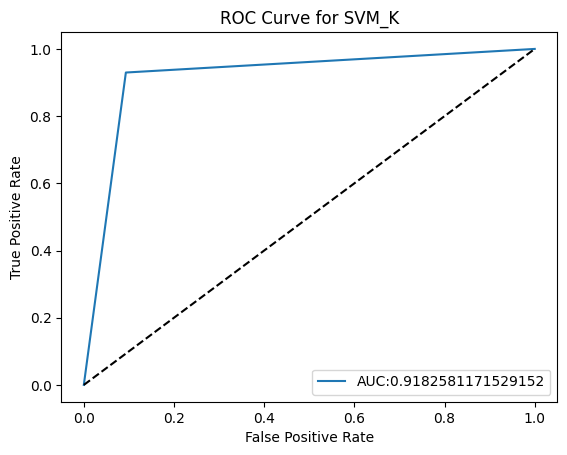

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.plot(fpr, tpr, label=f'AUC:{roc_auc_score(y_test, y_pred)}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for SVM_K')
plt.legend(loc='lower right')
plt.show()

### J48 and C5.0 after K-Best

In [ ]:
dt_k = DecisionTreeClassifier(criterion='entropy', ccp_alpha=0.012)
dt_k.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.012, criterion='entropy')

In [ ]:

param_dist_dt = {
    'max_depth': [None, 10, 20, 30, 40],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

dt_model = DecisionTreeClassifier(random_state=42)

random_search_dt = RandomizedSearchCV(dt_model, param_distributions=param_dist_dt, n_iter=10, cv=3, scoring='accuracy', n_jobs=-1, random_state=42)
random_search_dt.fit(x_train, y_train)

print("Best Parameters for Decision Tree:", random_search_dt.best_params_)
print("Best Cross-Validation Accuracy for Decision Tree:", random_search_dt.best_score_)

dt_k = random_search_dt.best_estimator_
dt_k.fit(x_train, y_train)


Best Parameters for Decision Tree: {'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': 10, 'criterion': 'entropy'}
Best Cross-Validation Accuracy for Decision Tree: 0.986505590095232


DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_split=5,
                       random_state=42)

In [ ]:
y_pred = dt_k.predict(x_train)
acc_dt_k = accuracy_score(y_train, y_pred)
ps_dt_k = precision_score(y_train, y_pred)
rs_dt_k = recall_score(y_train, y_pred)
f1_dt_k = f1_score(y_train, y_pred)

print(f'Accuracy Score = {acc_dt_k}')
print(f'Precision Score = {ps_dt_k}')
print(f'Recall Score = {rs_dt_k}')
print(f'F1 Score = {f1_dt_k}')

Accuracy Score = 0.9974296362935355
Precision Score = 0.9992207792207792
Recall Score = 0.995600414078675
F1 Score = 0.9974073113819031


In [ ]:
y_pred = dt_k.predict(x_test)
acc_dt_k1 = accuracy_score(y_test, y_pred)
ps_dt_k1 = precision_score(y_test, y_pred)
rs_dt_k1 = recall_score(y_test, y_pred)
f1_dt_k1 = f1_score(y_test, y_pred)

print(f'Accuracy Score = {acc_dt_k1}')
print(f'Precision Score = {ps_dt_k1}')
print(f'Recall Score = {rs_dt_k1}')
print(f'F1 Score = {f1_dt_k1}')

Accuracy Score = 0.9835082458770614
Precision Score = 0.9846244825547014
Recall Score = 0.9828807556080283
F1 Score = 0.983751846381093


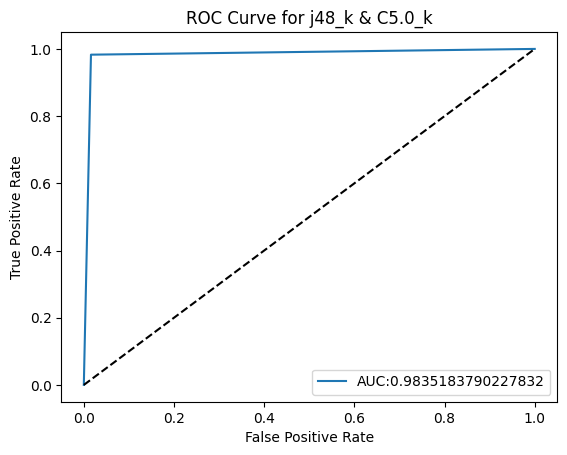

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.plot(fpr, tpr, label=f'AUC:{roc_auc_score(y_test, y_pred)}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for j48_k & C5.0_k')
plt.legend(loc='lower right')
plt.show()

### GBM after K-Best

In [ ]:
gbc_k = GradientBoostingClassifier()
gbc_k.fit(x_train, y_train)

GradientBoostingClassifier()

In [ ]:

param_dist_gbm = {
    'n_estimators': [50, 100, 150, 200],
    'learning_rate': [0.01, 0.1, 0.2, 0.3],
    'max_depth': [3, 4, 5, 6],
    'subsample': [0.8, 0.9, 1.0]
}

gbm_model = GradientBoostingClassifier(random_state=42)

random_search_gbm = RandomizedSearchCV(gbm_model, param_distributions=param_dist_gbm, n_iter=10, cv=3, scoring='accuracy', n_jobs=-1, random_state=42)
random_search_gbm.fit(x_train, y_train)

print("Best Parameters for GBM:", random_search_gbm.best_params_)
print("Best Cross-Validation Accuracy for GBM:", random_search_gbm.best_score_)

gbc_k = random_search_gbm.best_estimator_
gbc_k.fit(x_train, y_train)


Best Parameters for GBM: {'subsample': 0.8, 'n_estimators': 200, 'max_depth': 5, 'learning_rate': 0.3}
Best Cross-Validation Accuracy for GBM: 0.9934454732176848


GradientBoostingClassifier(learning_rate=0.3, max_depth=5, n_estimators=200,
                           random_state=42, subsample=0.8)

In [ ]:
y_pred = gbc_k.predict(x_test)
acc_gbc_k1 = accuracy_score(y_test, y_pred)
ps_gbc_k1 = precision_score(y_test, y_pred)
rs_gbc_k1 = recall_score(y_test, y_pred)
f1_gbc_k1 = f1_score(y_test, y_pred)

print(f'Accuracy Score = {acc_gbc_k1}')
print(f'Precision Score = {ps_gbc_k1}')
print(f'Recall Score = {rs_gbc_k1}')
print(f'F1 Score = {f1_gbc_k1}')

Accuracy Score = 0.9916041979010495
Precision Score = 0.9923167848699763
Recall Score = 0.9911452184179457
F1 Score = 0.9917306556408741


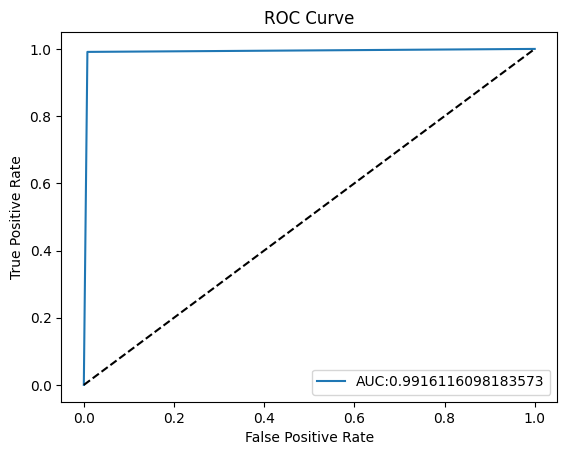

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.plot(fpr, tpr, label=f'AUC:{roc_auc_score(y_test, y_pred)}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

### Light GBM

/usr/local/lib/python3.11/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 3864, number of negative: 3917
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002473 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3099
[LightGBM] [Info] Number of data points in the train set: 7781, number of used features: 18
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.496594 -> initscore=-0.013623
[LightGBM] [Info] Start training from score -0.013623
LightGBM Accuracy: 0.9928035982008996
Accuracy Score = 0.9928035982008996
Precision Score = 0.9911764705882353
Recall Score = 0.9946871310507674
F1 Score = 0.9929286977018268


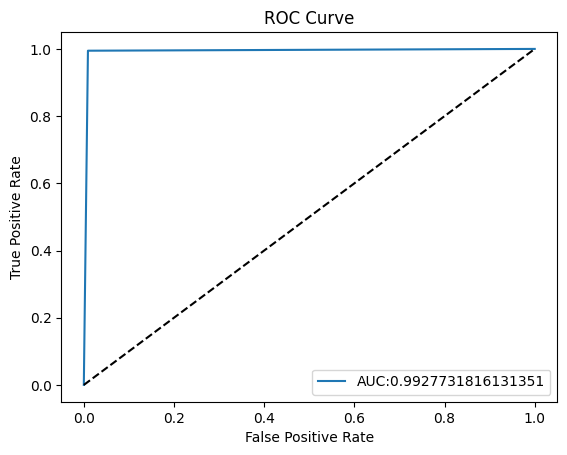

In [ ]:
from lightgbm import LGBMClassifier

# Initialize LightGBM Classifier
lgbm_model = LGBMClassifier(
    n_estimators=200,
    learning_rate=0.05,
    max_depth=10,
    random_state=42
)

# Train the model
lgbm_model.fit(x_train, y_train)


y_pred = lgbm_model.predict(x_test)
print("LightGBM Accuracy:", accuracy_score(y_test, y_pred))
y_pred = lgbm_model.predict(x_test)
a_lgbm_model = accuracy_score(y_test, y_pred)
p_lgbm_model = precision_score(y_test, y_pred)
r_lgbm_model = recall_score(y_test, y_pred)
f_lgbm_model = f1_score(y_test, y_pred)

print(f'Accuracy Score = {a_lgbm_model}')
print(f'Precision Score = {p_lgbm_model}')
print(f'Recall Score = {r_lgbm_model}')
print(f'F1 Score = {f_lgbm_model}')

fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.plot(fpr, tpr, label=f'AUC:{roc_auc_score(y_test, y_pred)}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()


In [ ]:
pip install shap


/usr/local/lib/python3.11/dist-packages/shap/explainers/_tree.py:448: UserWarning: LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray
  warnings.warn('LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray')


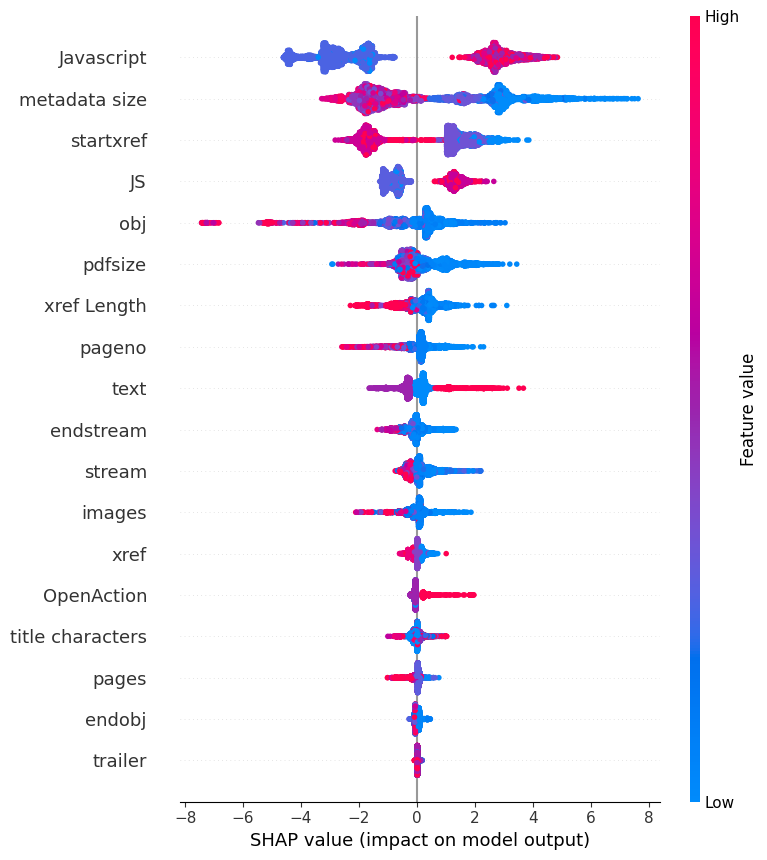

In [ ]:
import shap

# Create SHAP explainer
explainer = shap.TreeExplainer(lgbm_model)
shap_values = explainer.shap_values(x_train)

shap.summary_plot(shap_values, x_train)


### Hybrid Model

Hybrid Model Accuracy test: 0.9916041979010495
Hybrid Model Accuracy train: 0.9982007454054749


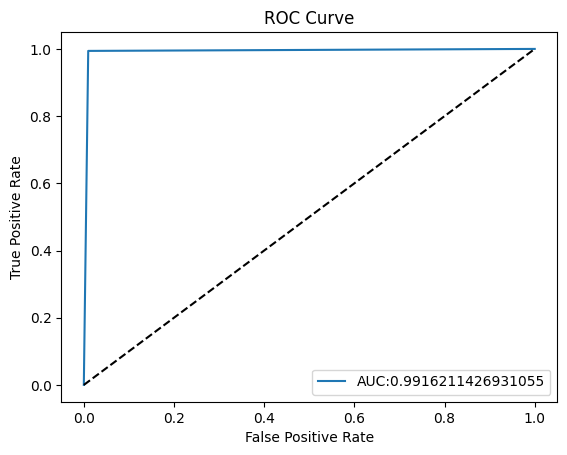

In [ ]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
gb_model = GradientBoostingClassifier(n_estimators=100, random_state=42)

hybrid_model = VotingClassifier(estimators=[
    ('random_forest', rf_model),
    ('gradient_boosting', gb_model)
], voting='soft')  # Use soft voting for probabilities

# Step 7: Train the Hybrid Model
hybrid_model.fit(x_train, y_train)

# Step 8: Evaluate the Model
y_pred_test = hybrid_model.predict(x_test)
y_pred_train = hybrid_model.predict(x_train)

print("Hybrid Model Accuracy test:", accuracy_score(y_test, y_pred_test))
print("Hybrid Model Accuracy train:", accuracy_score(y_train, y_pred_train))

fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.plot(fpr, tpr, label=f'AUC:{roc_auc_score(y_test, y_pred_test)}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

### Stacking Classifier

In [ ]:
from sklearn.ensemble import StackingClassifier
from xgboost import XGBClassifier

# Base models
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
xgb_model = XGBClassifier(n_estimators=100, random_state=42)

# Meta model
meta_model = GradientBoostingClassifier(random_state=42)

# Stacking Classifier
stacked_model = StackingClassifier(
    estimators=[
        ('random_forest', rf_model),
        ('xgboost', xgb_model)
    ],
    final_estimator=meta_model,
    cv=5
)

# Train and Evaluate
stacked_model.fit(x_train, y_train)
y_pred_test = stacked_model.predict(x_test)
y_pred_train = stacked_model.predict(x_train)

# Accuracy Scores
print("Stacking Classifier Accuracy on Test Set:", accuracy_score(y_test, y_pred_test))
print("Stacking Classifier Accuracy on Train Set:", accuracy_score(y_train, y_pred_train))

# ROC Curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_test)
plt.plot(fpr, tpr, label=f'AUC: {roc_auc_score(y_test, y_pred_test):.2f}')
plt.plot([0, 1], [0, 1], 'k--', label="Random Guess")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Stacking Classifier')
plt.legend(loc='lower right')
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The XGBClassifier or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The XGBClassifier or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags

AttributeError: 'super' object has no attribute '__sklearn_tags__'